In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

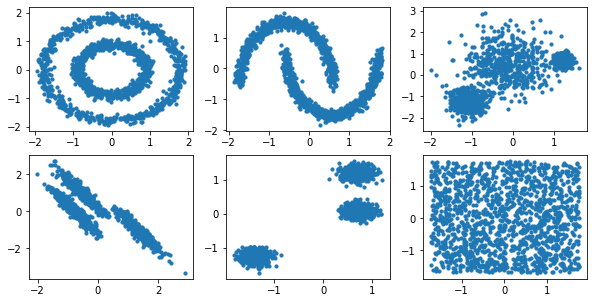

In [2]:
datasets = [noisy_circles, noisy_moons, varied, aniso, blobs, no_structure]
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()
for index, dataset in enumerate(datasets):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    axes[index].scatter(X[:, 0], X[:, 1], s=10)
    

# K-Means Clustering

### But how to evaluate the number of clusters ?
### WCSS 'Within Cluster Sum of Squares'
### So we apply the elbow method to see how the number of cluster affect the WCSS 

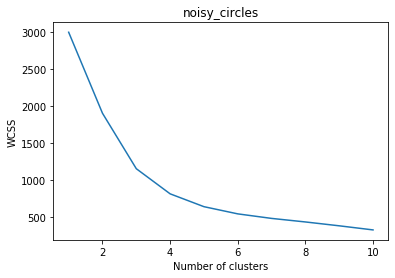

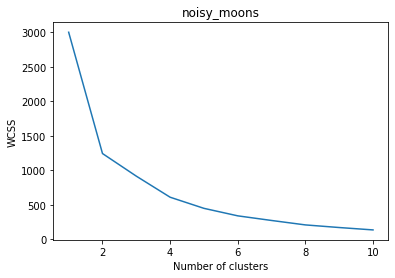

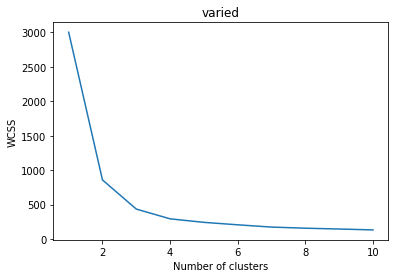

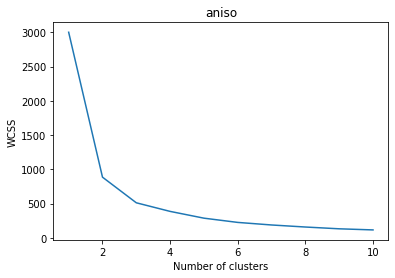

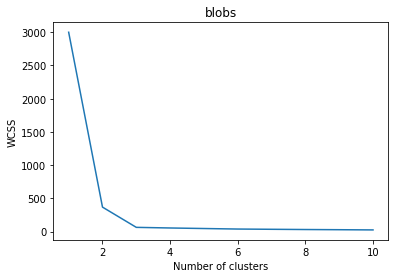

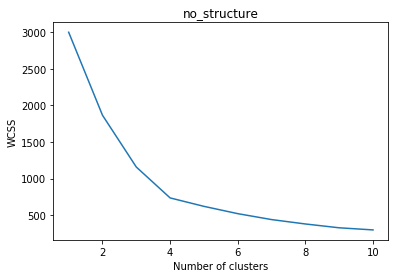

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
datasets = [noisy_circles, noisy_moons, varied, aniso, blobs, no_structure]
title=['noisy_circles', 'noisy_moons', 'varied', 'aniso', 'blobs', 'no_structure']
c=0
for index, dataset in enumerate(datasets):
    wcss=[]
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    features = X
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, random_state = 0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title(title[c])
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    c+=1

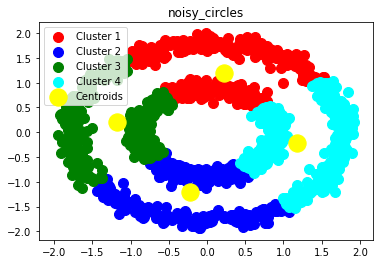

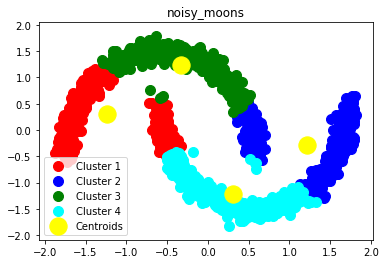

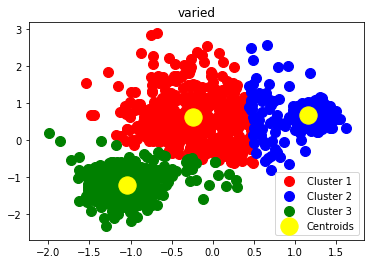

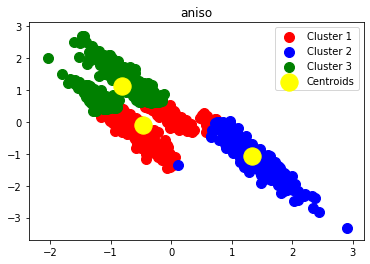

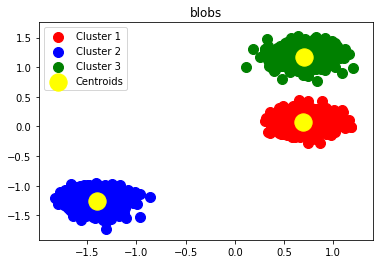

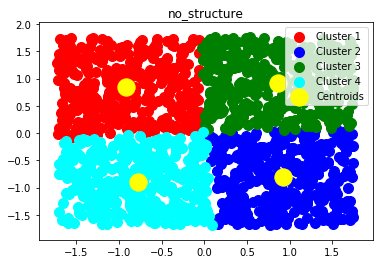

In [4]:
datasets = [noisy_circles, noisy_moons, varied, aniso, blobs, no_structure]
title=['noisy_circles', 'noisy_moons', 'varied', 'aniso', 'blobs', 'no_structure']
n=[4,4,3,3,3,4]
c=0
for index, dataset in enumerate(datasets):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    features = X
    kmeans = KMeans(n_clusters = n[c], random_state = 0)
    kmeans_predictions = kmeans.fit_predict(features)

    # visualizing it
    # Visualising the clusters
    plt.scatter(features[kmeans_predictions == 0, 0], features[kmeans_predictions == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(features[kmeans_predictions == 1, 0], features[kmeans_predictions == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(features[kmeans_predictions == 2, 0], features[kmeans_predictions == 2, -1], s = 100, c = 'green', label = 'Cluster 3')
    if n[c] == 4: 
        plt.scatter(features[kmeans_predictions == 3, 0], features[kmeans_predictions == 3, -1], s = 100, c = 'cyan', label = 'Cluster 4')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, -1], s = 300, c = 'yellow', label = 'Centroids')
    plt.title(title[c])
    plt.legend()
    plt.show()
    c+=1


# HC Clustering

## Dendrograms

Dendrograms is like a memory for the HC, it keep track of the splitting so that we can see where to stop splitting

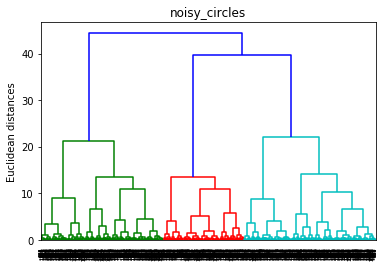

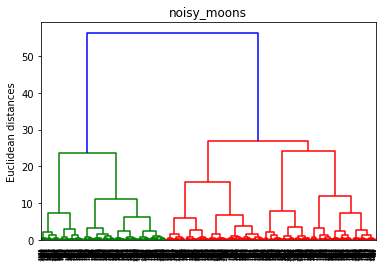

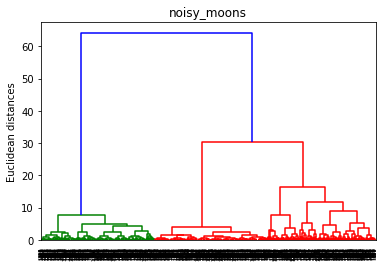

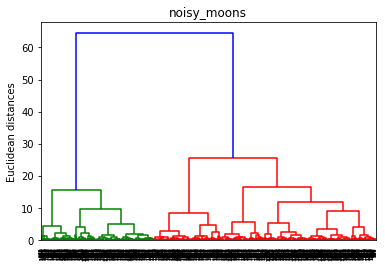

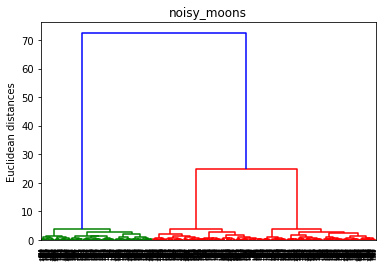

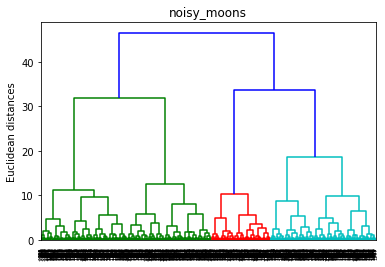

In [8]:
import scipy.cluster.hierarchy as sch
datasets = [noisy_circles, noisy_moons, varied, aniso, blobs, no_structure]
title=['noisy_circles', 'noisy_moons', 'varied', 'aniso', 'blobs', 'no_structure']
c=0
for index, dataset in enumerate(datasets):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    features = X
    dendrogram = sch.dendrogram(sch.linkage(features, method = 'ward'))
    plt.title(title[c])
    c=+1
    plt.ylabel('Euclidean distances')
    plt.show()

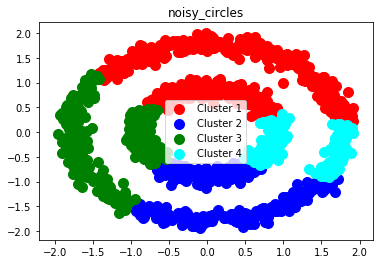

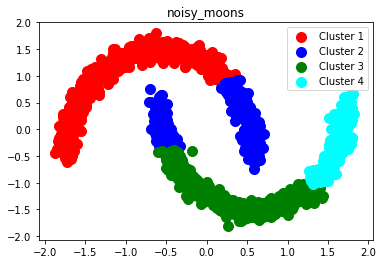

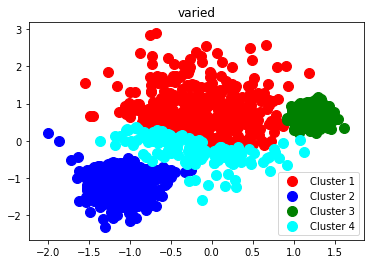

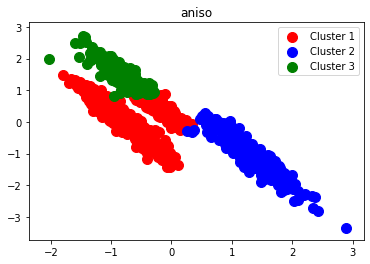

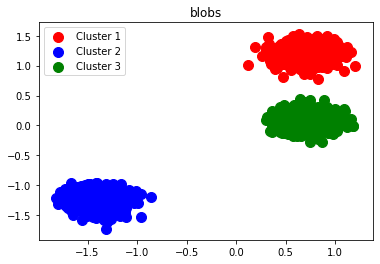

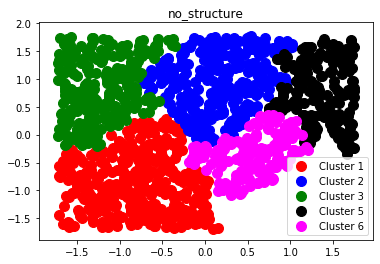

In [10]:
from sklearn.cluster import AgglomerativeClustering
datasets = [noisy_circles, noisy_moons, varied, aniso, blobs, no_structure]
title=['noisy_circles', 'noisy_moons', 'varied', 'aniso', 'blobs', 'no_structure']
n=[4,4,4,3,3,6]
c=0
for index, dataset in enumerate(datasets):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    features = X
    hc = AgglomerativeClustering(n_clusters = n[c])
    y_hc = hc.fit_predict(features)

    # visualizing it
    # Visualising the clusters
    plt.scatter(features[y_hc == 0, 0], features[y_hc == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(features[y_hc == 1, 0], features[y_hc == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(features[y_hc == 2, 0], features[y_hc == 2, -1], s = 100, c = 'green', label = 'Cluster 3')
    if n[c] == 4:
        plt.scatter(features[y_hc == 3, 0], features[y_hc == 3, -1], s = 100, c = 'cyan', label = 'Cluster 4')
    elif n[c] == 6:
        plt.scatter(features[y_hc == 4, 0], features[y_hc == 4, -1], s = 100, c = 'black', label = 'Cluster 5')
        plt.scatter(features[y_hc == 5, 0], features[y_hc == 5, -1], s = 100, c = 'magenta', label = 'Cluster 6')
    plt.title(title[c])
    plt.legend()
    plt.show()
    c+=1
